## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [3]:
diabetes_data = pd.read_csv('C:/Users/hecsa/Springboard/Springboard Github/Springboard/1600185186_GridSearchKNN_Case_Study/data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [5]:
# Use .info() to review the data info

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [7]:
# Use .describe() to review summmary statistics of the data

diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [9]:
# Replace the zero values in the specified columns by first creating list 'columns_to_replace'

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

In [11]:
# Print the head of the dataset to verify if the changes were made correctly

print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**<font color='teal'> Plot histograms of each column. </font>**

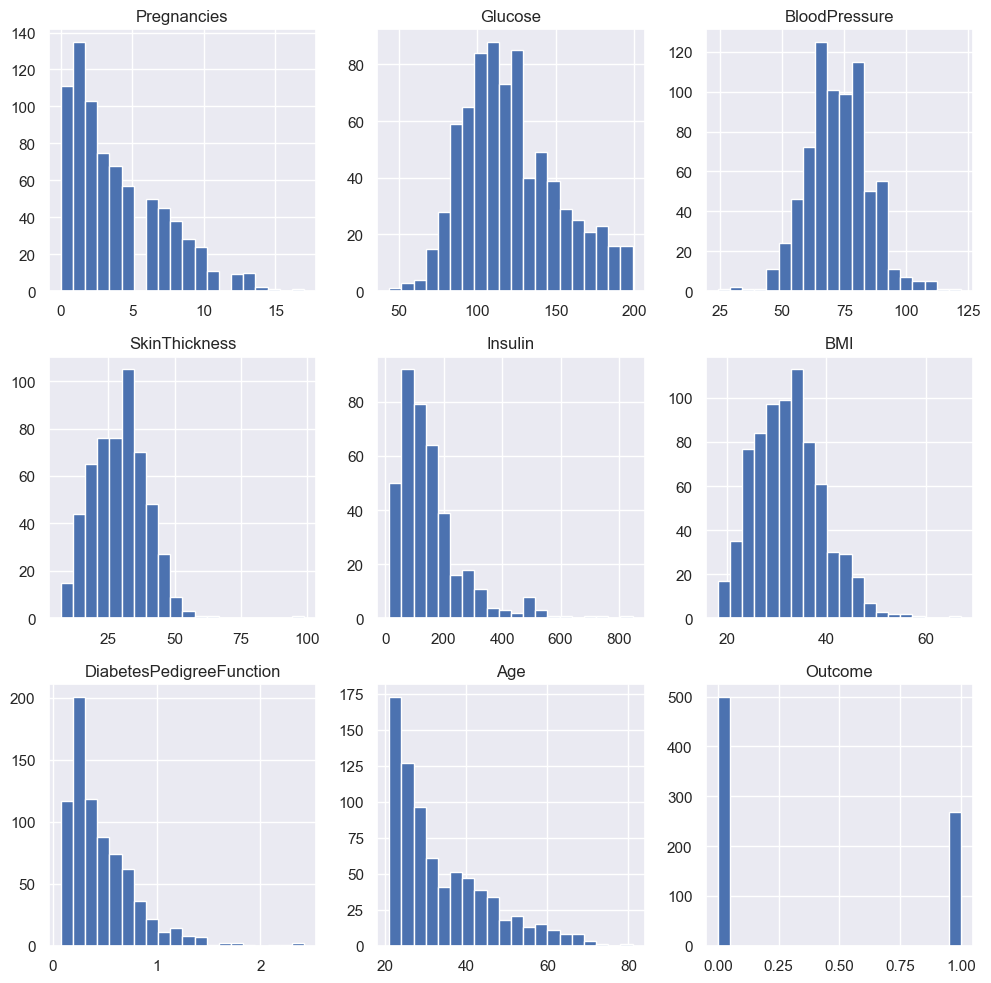

In [13]:
# Plot histograms of each column

diabetes_data.hist(figsize=(10, 10), bins=20)

# Show the plots

plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [15]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

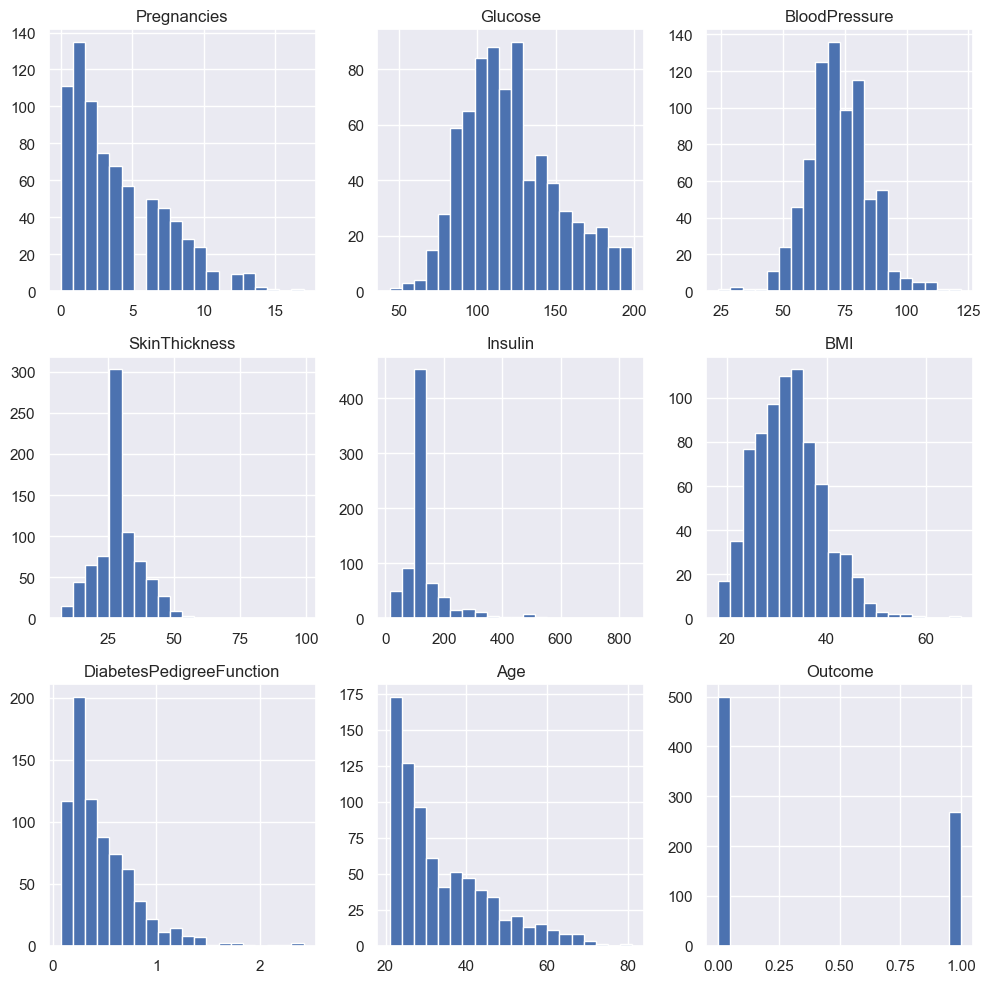

In [17]:
# Plot the histograms of each column after having replaced NaN values

diabetes_data.hist(figsize=(10, 10), bins=20)

# Show the plots

plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


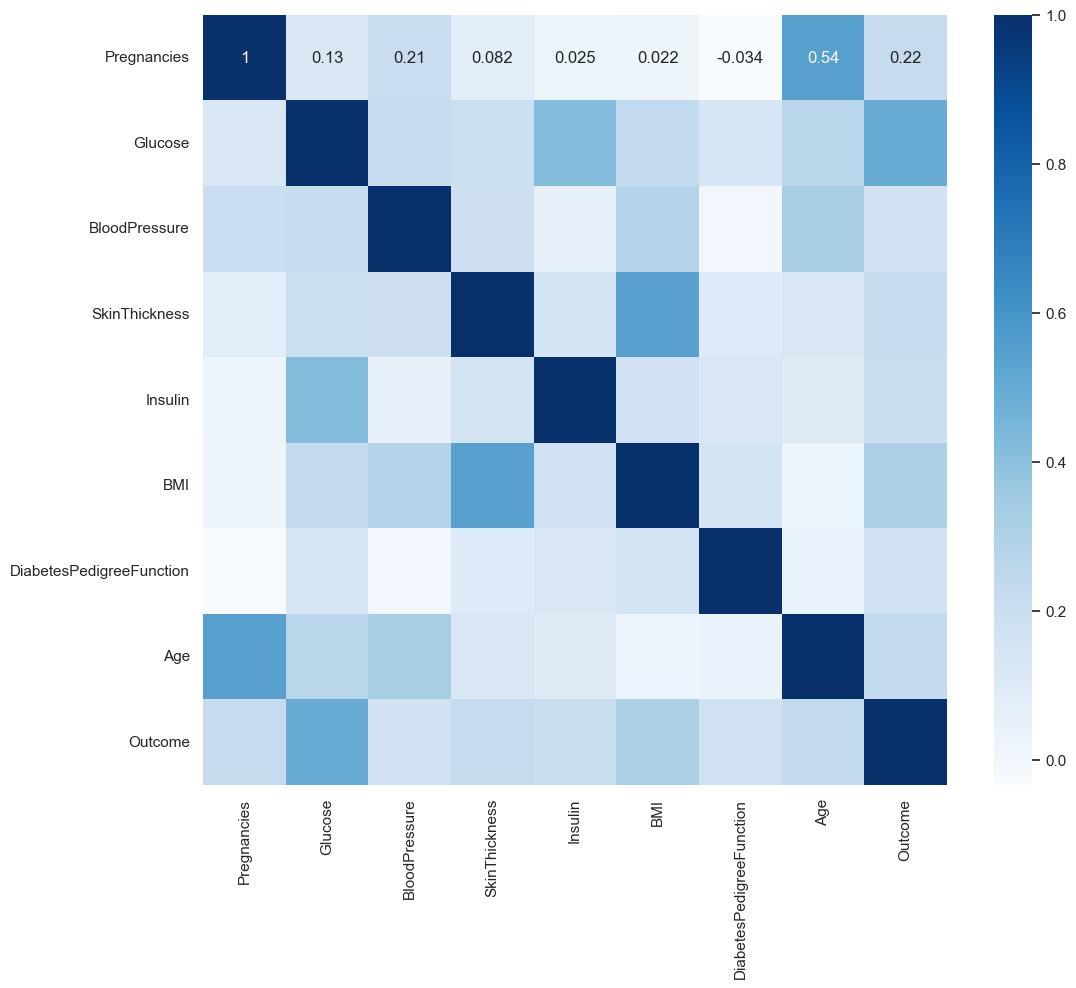

In [19]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [25]:
# Define the y variable (Outcome column)

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [29]:
# Start by importing the necessary package
# Use train_test_split() to perform a 70/30 train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
# Print the shape of X_train and X_test to verify the shape of the splits

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (537, 8)
Testing data shape: (231, 8)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [35]:
# Start by importing the necessary package

from sklearn.preprocessing import StandardScaler

# Use StandardScaler() to standardize the magnitude of teh features

scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train

X_train_scaled = scaler.fit_transform(X_train)

# Use the fitted scaler to trainsform X_test

X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled data

print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")

Scaled training data shape: (537, 8)
Scaled testing data shape: (231, 8)


#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [49]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hecsa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWa

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [51]:
# Print the train and test scores for each iteration

print(f"k = {i}: Train SCore = {train_scores[-1]:.4f}, Test Score = {test_scores[-1]:.4f}")

k = 9: Train SCore = 0.6499, Test Score = 0.6537


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [53]:
# Find the k with the maximum train score

max_train_score = max(train_scores)
optimal_k = train_scores.index(max_train_score) + 1

# Print the result

print(f"The optimal number of neighbors (k) with the highest training score is: {optimal_k}")
print(f"Maximum training score: {max_train_score:.4f}")

The optimal number of neighbors (k) with the highest training score is: 1
Maximum training score: 0.6499


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [55]:
# Find the k with the maximum test score

max_test_score = max(test_scores)
optimal_k_test = test_scores.index(max_test_score) + 1

# Print the result

print(f"The optimal number of neighbors (k) with the highest testing score is: {optimal_k_test}")
print(f"Maximum testing score: {max_test_score:.4f}")

The optimal number of neighbors (k) with the highest testing score is: 1
Maximum testing score: 0.6537


Plot the train and test model performance by number of neighbors.

C:\Users\hecsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hecsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hecsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hecsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

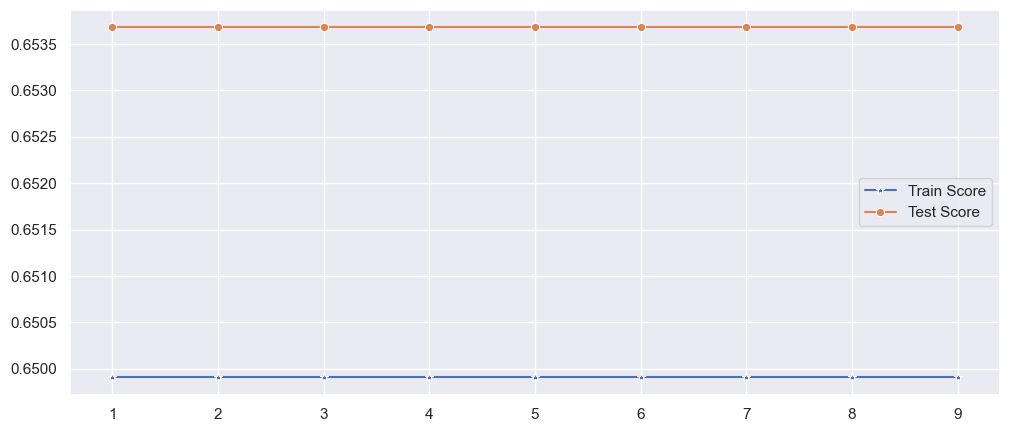

In [61]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [63]:
# Assuming optimal_k_test is determined from the previous step
optimal_k_test = test_scores.index(max(test_scores)) + 1  # Replace with the actual value if needed

# Fit the KNN model with the optimal k
knn_best = KNeighborsClassifier(n_neighbors=optimal_k_test)
knn_best.fit(X_train_scaled, y_train)

# Score the model on training and testing data
train_score_best = knn_best.score(X_train_scaled, y_train)
test_score_best = knn_best.score(X_test_scaled, y_test)

# Print the scores
print(f"Optimal number of neighbors (k): {optimal_k_test}")
print(f"Training score: {train_score_best:.4f}")
print(f"Testing score: {test_score_best:.4f}")


Optimal number of neighbors (k): 1
Training score: 1.0000
Testing score: 0.6667


In [69]:
# IMport the necessary package

from sklearn.metrics import confusion_matrix

# PRedict the confusion matrix

y_pred = knn_best.predict(X_test_scaled)

# Generate the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

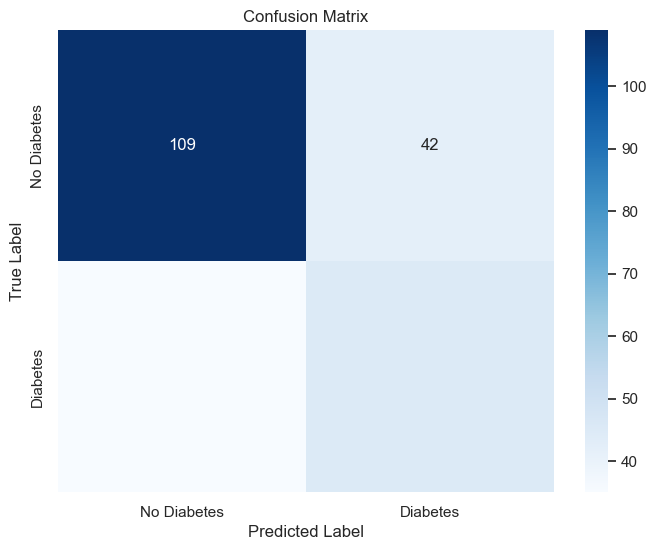

In [71]:
# Plot the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [75]:
# Import the necessary package

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       151
           1       0.52      0.56      0.54        80

    accuracy                           0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [79]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [81]:
# Import the necessary packages

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [83]:
# Define the parameter grid for the number of estimators
param_grid_rf = {'n_estimators': np.arange(1, 100, 5)}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Set up the GridSearchCV
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)

# Fit the model
rf_cv.fit(X_train_scaled, y_train)

# Print the best score and best parameters
print("Best Score: " + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score: 0.783939079266182
Best Parameters: {'n_estimators': 81}
